In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_16_4_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_12_image_4_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_7_image_9_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_17_image_20_3_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_20_image_5_1_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_21_image_17_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam/planet/planet_page_11_image_2_2_SwinIR_large.png
/kaggle/input/spacenet-an-optimally-dist

In [ ]:
DATASET_PATH = "/kaggle/input"

os.listdir(DATASET_PATH)


The dataset is located inside the Kaggle input directory under the folder:

`spacenet-an-optimally-distributed-astronomy-data`

This folder contains all the data required for exploration and analysis.
All further operations reference this directory as the dataset root.


In [4]:
DATASET_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data"

os.listdir(DATASET_PATH)


['SpaceNet.FLARE.imam_alam']

After listing the contents of the dataset root directory, we observe that the
data is stored inside a single folder named `SpaceNet.FLARE.imam_alam`.

This indicates that all image classes and related data are organized within
this directory. Further exploration is required inside this folder to identify
the actual class-wise image separation.


In [5]:
MAIN_DATA_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"

os.listdir(MAIN_DATA_PATH)


['planet',
 'galaxy',
 'black hole',
 'asteroid',
 'comet',
 'star',
 'constellation',
 'nebula']

By exploring the main dataset directory, we identified the following image
classes present in the SpaceNet dataset:

 planet   galaxy  black hole  asteroid  
 comet  star  constellation  nebula  



In [6]:
from collections import Counter

class_paths = {
    cls: os.path.join(MAIN_DATA_PATH, cls)
    for cls in os.listdir(MAIN_DATA_PATH)
}

class_counts = {}

for cls, cls_path in class_paths.items():
    class_counts[cls] = len([
        img for img in os.listdir(cls_path)
        if img.lower().endswith(('.png', '.jpg', '.jpeg'))
    ])

class_counts


{'planet': 1472,
 'galaxy': 3984,
 'black hole': 656,
 'asteroid': 283,
 'comet': 416,
 'star': 3269,
 'constellation': 1552,
 'nebula': 1192}

The number of images in each class was counted to understand data distribution.
The dataset is not balanced, as some classes have many more images than others.


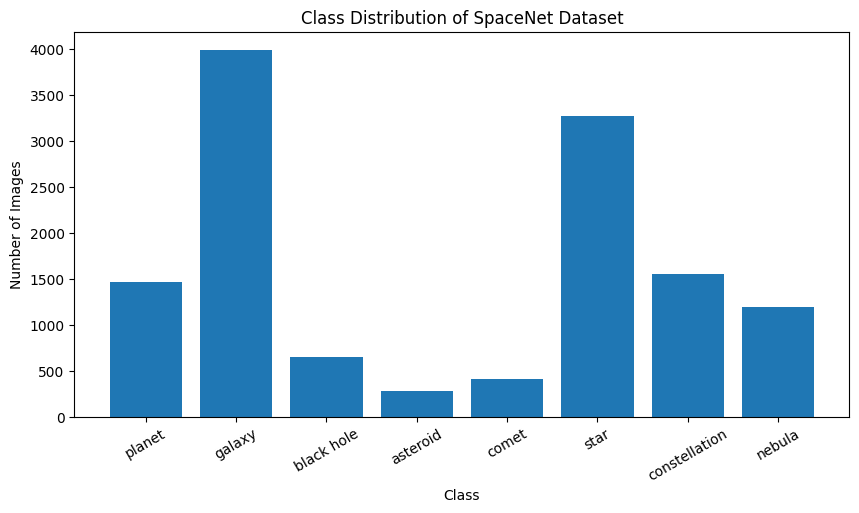

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=30)
plt.title("Class Distribution of SpaceNet Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


The bar chart shows the number of images in each class.
Some classes like *Galaxy* and *Star* have many more samples,
while classes like *Asteroid* and *Comet* have fewer images,
indicating class imbalance in the dataset.


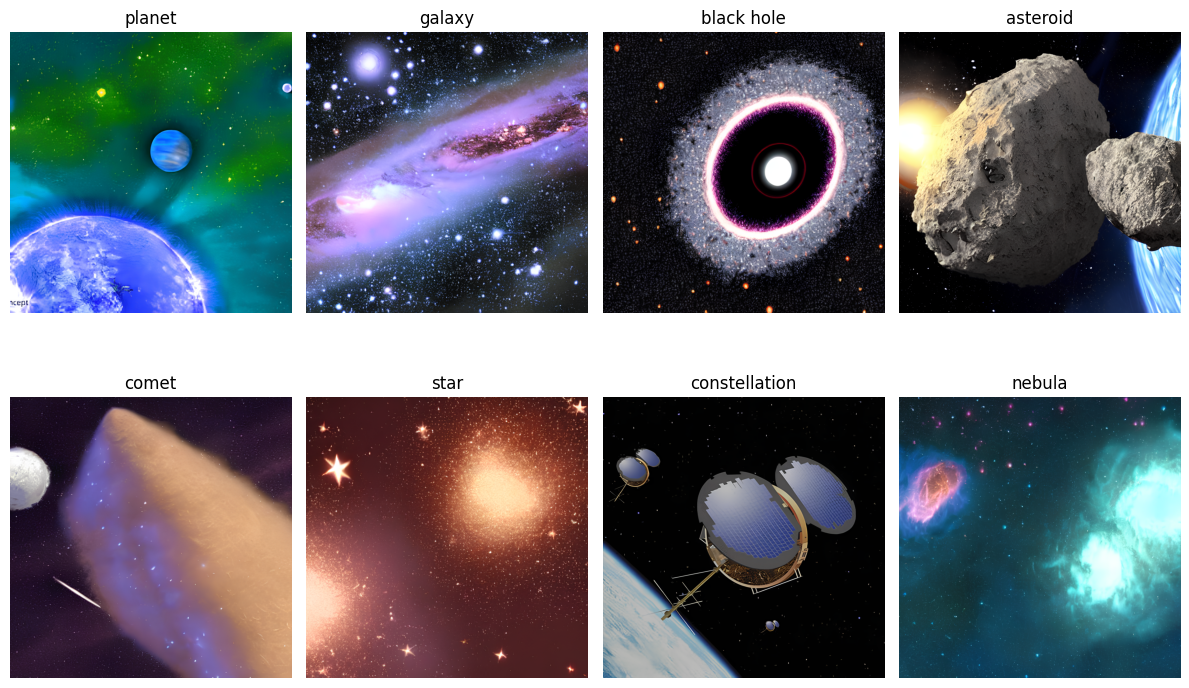

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import random

plt.figure(figsize=(12, 8))

for idx, cls in enumerate(class_counts.keys()):
    cls_path = os.path.join(MAIN_DATA_PATH, cls)
    img_name = random.choice(os.listdir(cls_path))
    img_path = os.path.join(cls_path, img_name)

    img = Image.open(img_path)

    plt.subplot(2, 4, idx + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(cls)

plt.tight_layout()
plt.show()


Random images from each class were displayed to visually understand the dataset.
The images show clear visual differences between astronomical objects such as
planets, galaxies, stars, and nebulae.


In [10]:
from PIL import Image
from collections import Counter

resolutions = []
formats = []

for cls in class_counts.keys():
    cls_path = os.path.join(MAIN_DATA_PATH, cls)
    images = os.listdir(cls_path)[:100]  
    
    for img_name in images:
        img_path = os.path.join(cls_path, img_name)
        try:
            img = Image.open(img_path)
            resolutions.append(img.size)  
            formats.append(img.format)
        except:
            continue


res_df = pd.DataFrame(resolutions, columns=["Width", "Height"])
res_df.describe()


,Width,Height
count,767.0,767.0
mean,2048.0,2048.0
std,0.0,0.0
min,2048.0,2048.0
25%,2048.0,2048.0
50%,2048.0,2048.0
75%,2048.0,2048.0
max,2048.0,2048.0


The image resolution analysis shows that all sampled images have a fixed size of
2048 × 2048 pixels. This indicates that the dataset is uniform in terms of image
resolution, which simplifies preprocessing and model input handling.


In [11]:
pd.Series(formats).value_counts()


PNG    767
Name: count, dtype: int64

All sampled images in the dataset are in PNG format.
This ensures consistency and avoids issues related to mixed image file types
during preprocessing and model training.


- The dataset contains 8 different astronomical object classes.
- Class distribution is imbalanced, with Galaxy and Star having more samples.
- Random image visualization shows clear visual differences between classes.
- All images have a fixed resolution of 2048 × 2048 pixels.
- All images are stored in PNG format, making preprocessing straightforward.
